In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

## **FUNÇÕES**

Teorema de bolzano

In [ ]:
def bolzano(f, a, b):
  return f(a)*f(b) < 0

Método de Newton-Raphson

In [ ]:
def newton_raphson(f, dfdx, x0, e = 1e-10, maxiter=100):
  i = 1
  erro = 1e6

  while (i <= maxiter) and erro > e:
    xr = x0 - f(x0)/dfdx(x0)
    erro = abs(xr - x0) / abs(x0)
    print(f'iteração:{i}, raiz:{xr}, f(x):{f(xr)}, erro:{erro}')

    x0 = xr
    i += 1
  return xr, f(xr)

Método das Secantes

In [ ]:
def secants(f, x0, x1, e = 1e-10, maxiter=100):
  i = 1
  erro = 1e6

  while (i <= maxiter) and erro > e:
    xr = x0 - f(x0) / ((f(x0) - f(x1)) / (x0 - x1))
    erro = abs(xr - x0) / abs(x0)
    print(f'iteração:{i}, raiz:{xr}, f(x):{f(xr)}, erro:{erro}')

    x1 = x0
    x0 = xr
    i += 1
  return xr, f(xr)

Busca Intervalar

In [ ]:
def encontra_intervalo(a0, xmax, h0, f):
  refi = a0

  while h0 > 1e-4:
    b0 = a0 + h0
    while b0 < xmax:
      if f(a0)*f(b0) < 0:
        return a0, b0
      a0 = b0
      b0 = a0 + h0
    a0 = refi
    h0 = h0/10

Busca Multi-Intervalar

In [ ]:
def encontra_varios_intervalos(a0,xmax,h0,f):
    refi = a0
    vet_a0 = []
    vet_b0 = []

    while h0 > 1e-4:
        b0 = a0 + h0
        while b0 < xmax:
            if f(a0)*f(b0) < 0:
                vet_a0.append(a0)
                vet_b0.append(b0)

            a0 = b0
            b0 = a0 + h0

        if len(vet_a0) > 0:
            return(vet_a0, vet_b0)

        a0 = refi
        h0 = h0/10

## **Questão 1 - ok**

In [ ]:
def f1(x):
  return np.cos(x) - x**2

In [ ]:
def df1dx(x):
  return -1*np.sin(x) - 2*x

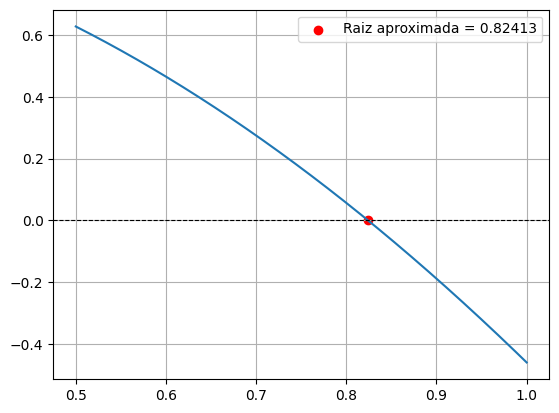

In [ ]:
x = np.linspace(0.5, 1, 1000)
y = [f1(i) for i in x]

plt.grid()
plt.plot(x, y)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.scatter([0.82413], [0], color='red', label='Raiz aproximada = 0.82413')
plt.legend()

plt.show()

In [ ]:
newton_raphson(f1, df1dx, 1)

In [ ]:
secants(f1, 1, 1.1)

## **Questão 2 - ok**

In [ ]:
def f2(x):
  return np.tan(x) - 2*x**2

In [ ]:
def df2dx(x):
  return np.cos(x)**(-2) - 4*x

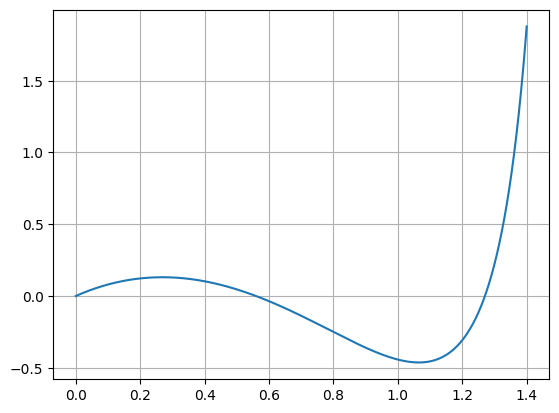

In [ ]:
x = np.linspace(0, 1.4, 10000)
y = [f2(i) for i in x]

plt.grid()
plt.plot(x, y)

plt.show()

In [ ]:
[vxL, vxU] = encontra_varios_intervalos(0, 2, 0.1,f2)
print(vxL)
print(vxU)

[0.5, 1.2, 1.5000000000000002]
[0.6, 1.3, 1.6000000000000003]


In [ ]:
newton_raphson(f2, df2dx, 0.5)

In [ ]:
newton_raphson(f2, df2dx, 1.2)

## **Questão 3 - ???**

In [ ]:
def f3(x, n, A):
  return x**n - A

In [ ]:
def df3dx(x, n, A):
  return n*x**(n-1)

## **Questão 4**

In [ ]:
def f4(x):
  return x**4 - 4*x**2 + 4

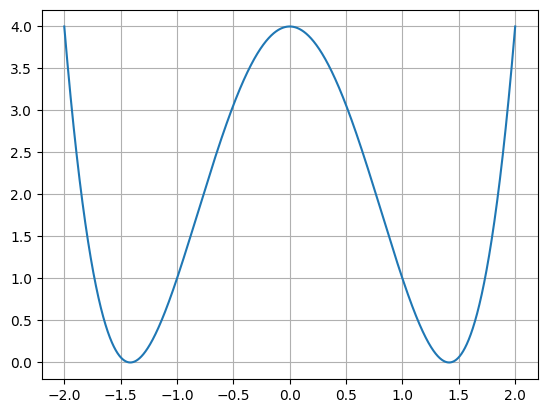

In [ ]:
x = np.linspace(-2, 2, 10000)
y = f4(x)

plt.grid()
plt.plot(x, y)

plt.show()

In [ ]:
secants(f4, -1, -1.1)

## **Questão 5**

In [ ]:
def f5(x):
  return (x**5)/100 + x**4 + 3*x + 1

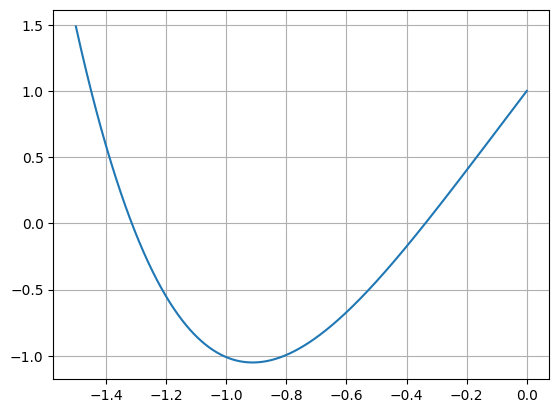

In [ ]:
x = np.linspace(-1.5, 0, 10000)
y = f5(x)

plt.grid()
plt.plot(x, y)

plt.show()

In [ ]:
encontra_varios_intervalos(-1.4, 0, 0.01, f5)

([-1.3199999999999998, -0.33999999999999897],
 [-1.3099999999999998, -0.32999999999999896])

In [ ]:
secants(f5, -1.32, -1.31)

iteração:1, raiz:-1.313965511685139, f(x):-0.00024271357516747472, erro:0.004571582056712944
iteração:2, raiz:-1.3140060547588028, f(x):-2.4697626836989173e-06, erro:3.085550823313541e-05
iteração:3, raiz:-1.3140064715510997, f(x):1.7298118493158654e-10, erro:3.1719206725751705e-07
iteração:4, raiz:-1.3140064715219097, f(x):-4.440892098500626e-16, erro:2.2214490107486095e-11


(-1.3140064715219097, -4.440892098500626e-16)

In [ ]:
secants(f5, -0.34, -0.33)

iteração:1, raiz:-0.33765558899355586, f(x):-1.2081605187841404e-05, erro:0.006895326489541674
iteração:2, raiz:-0.3376513424756509, f(x):6.815545350313812e-09, erro:1.2576477462255926e-05
iteração:3, raiz:-0.3376513448698706, f(x):-6.8833827526759706e-15, erro:7.090804656135884e-09
iteração:4, raiz:-0.33765134486986814, f(x):1.1102230246251565e-16, erro:7.233765513703699e-15


(-0.33765134486986814, 1.1102230246251565e-16)

## **Questão 6**

In [ ]:
def f6(x):
  return np.exp(-x**2) - 2*x

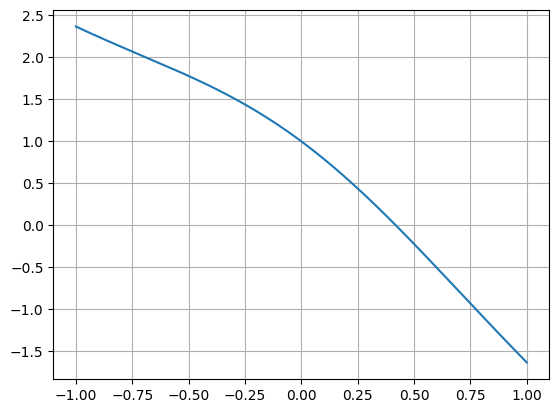

In [ ]:
x = np.linspace(-1, 1, 10000)
y = f6(x)

plt.grid()
plt.plot(x, y)

plt.show()

In [ ]:
encontra_varios_intervalos(0, 1, 0.01, f6)

([0.4100000000000002], [0.4200000000000002])

In [ ]:
secants(f6, 0.41, 0.42)

iteração:1, raiz:0.4193636136480389, f(x):3.2721980238736847e-06, erro:0.02283808206838768
iteração:2, raiz:0.4193648263275324, f(x):-6.240684191638479e-09, erro:2.891713668099633e-06
iteração:3, raiz:0.41936482401913183, f(x):1.6653345369377348e-15, erro:5.504516442190766e-09
iteração:4, raiz:0.41936482401913244, f(x):0.0, erro:1.4560655271267552e-15


(0.41936482401913244, 0.0)